In [3]:
import pandas as pd
import numpy as np

In [4]:
# Loading datasets
df = pd.read_csv('Nepali_Treking_EnhancedV2.csv')

In [5]:
df.head(10)

,Unnamed: 0,Trek,Cost,Time,Trip Grade,Max Altitude,Accomodation,Best Travel Time,Date of Travel,Sex,...,Regional code,Country,Fitness Level,Weather Conditions,Trekking Group Size,Guide/No Guide,Equipment Used,Purpose of Travel,Health Incidents,Review/Satisfaction
0,0,Everest Base Camp Trek,"\n$1,420 USD",16 Days,Moderate,5545 m,Hotel/Guesthouse,March - May & Sept - Dec,9/13/2022,Non-Binary,...,0,total,Intermediate,Clear,10.0,Guide,Poles,Leisure,NaN,4.5
1,1,Everest Base Camp Short Trek,"\n$1,295 USD",14 Days,Moderate,5545 m,Hotel/Guesthouse,March - May & Sept - Dec,09/04/2021,Female,...,40,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Everest Base Camp Heli Shuttle Trek,\n$2000 USD,12 Days,Moderate,5545 m,Hotel/Guesthouse,March - May & Sept - Dec,1/25/2021,Female,...,80,Albania,Advanced,Snowy,12.0,Guide,Oxygen,Charity,NaN,5.0
3,3,Everest Base Camp Heli Trek,"\n$3,300 USD",11 Days,Moderate,5545 m,Hotel/Guesthouse,March - May & Sept - Dec,1/28/2022,Non-Binary,...,120,Algeria,Intermediate,Clear,5.0,Guide,Poles,Leisure,NaN,4.0
4,4,Everest Base Camp Trek for Seniors,"\n$1,800 USD",20 Days,Moderate,5545 m,Hotel/Guesthouse,March - May & Sept - Dec,10/21/2021,Non-Binary,...,200,Andra,Beginner,Cloudy,6.0,No Guide,NaN,Adventure,Minor Injury,3.5
5,5,Everest Chola Pass Trek,"\n$1,720 USD",19 Days,Strenuous,5545 m,Hotel/Guesthouse,March - May & Sept - Dec,1/25/2022,Non-Binary,...,240,Angola,Intermediate,Clear,10.0,Guide,Poles,Leisure,NaN,4.5
6,6,Gokyo Lake Renjo La Pass Trek,"\n$1,450 USD",16 Days,Moderate,5360 m,Hotel/Guesthouse,March - May & Sept - Dec.,08/07/2022,Male,...,280,Antigua Berbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,Everest High Passes Trek,"\n$1,950 USD",22 Days,Strenuous,5545 m,Hotel/Guesthouse,April - May & Sept - Nov,01/04/2021,Transgender,...,310,Azerbaijan,Advanced,Snowy,12.0,Guide,Oxygen,Charity,NaN,5.0
8,8,Short Everest Trek,\n$1060 USD,7 Days,Easy To Moderate,3900 m,Hotel/Guesthouse,March - May & Sept - Dec.,6/28/2022,Female,...,320,Argentina,Intermediate,Clear,5.0,Guide,Poles,Leisure,NaN,4.0
9,9,Everest Panorama Trek,\n$1150 USD,10 Days,Easy To Moderate,3860 m,Hotel/Guesthouse,Jan - May & Sept - Dec,1/31/2020,Female,...,360,Australia,Beginner,Cloudy,6.0,No Guide,NaN,Adventure,Minor Injury,3.5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           383 non-null    int64  
 1   Trek                 383 non-null    object 
 2   Cost                 383 non-null    object 
 3   Time                 383 non-null    object 
 4   Trip Grade           383 non-null    object 
 5   Max Altitude         383 non-null    object 
 6   Accomodation         383 non-null    object 
 7   Best Travel Time     383 non-null    object 
 8   Date of Travel       383 non-null    object 
 9   Sex                  383 non-null    object 
 10  Age                  383 non-null    int64  
 11  Employment Type      383 non-null    object 
 12  GraduateOrNot        383 non-null    object 
 13  AnnualIncome         383 non-null    int64  
 14  FrequentFlyer        383 non-null    object 
 15  Year                 383 non-null    int

## **Data Pre-Processing**

In [7]:
# Droping the unnecessary 'Unnamed: 0' column
df= df.drop(columns=['Unnamed: 0'])

In [8]:
print(df.select_dtypes("object").columns, end="\n\n")
print(df.select_dtypes(np.number).columns)

Index(['Trek', 'Cost', 'Time', 'Trip Grade', 'Max Altitude', 'Accomodation',
       'Best Travel Time', 'Date of Travel', 'Sex', 'Employment Type',
       'GraduateOrNot', 'FrequentFlyer', 'Country', 'Fitness Level',
       'Weather Conditions', 'Guide/No Guide', 'Equipment Used',
       'Purpose of Travel', 'Health Incidents'],
      dtype='object')

Index(['Age', 'AnnualIncome', 'Year', 'Regional code', 'Trekking Group Size',
       'Review/Satisfaction'],
      dtype='object')


## **`Trek` Column**

In [9]:
def clean_trek_name(trek_name):
    # Remove non-ASCII characters
    trek_name = trek_name.encode('ascii', 'ignore').decode('ascii')
    # Strip extra whitespace
    trek_name = trek_name.strip()
    return trek_name

# Apply the cleaning function to the 'Trek' column in df
df['Trek'] = df['Trek'].apply(clean_trek_name)

# Check the result
print(df['Trek'].head())

0                 Everest Base Camp Trek
1           Everest Base Camp Short Trek
2    Everest Base Camp Heli Shuttle Trek
3            Everest Base Camp Heli Trek
4     Everest Base Camp Trek for Seniors
Name: Trek, dtype: object


In [10]:
print(df['Trek'].value_counts())

Trek
Annapurna Base Camp Trek                               15
Upper Mustang Trek                                     15
Manaslu Circuit Trek                                   15
Annapurna Circuit Trek                                 15
Mardi Himal Trek                                       15
                                                       ..
Everest Base Camp Heli Shuttle Trek                     1
Gokyo Lake Renjo La Pass Trek                           1
Everest Base Camp Trek with Chola and Renjo La Pass     1
Luxury Everest Base Camp Heli Trek                      1
Short Everest Trek                                      1
Name: count, Length: 68, dtype: int64


In [11]:
df['Trek']

0                   Everest Base Camp Trek
1             Everest Base Camp Short Trek
2      Everest Base Camp Heli Shuttle Trek
3              Everest Base Camp Heli Trek
4       Everest Base Camp Trek for Seniors
                      ...                 
378               Ghorepani Poon Hill Trek
379                     Upper Mustang Trek
380                       Mardi Himal Trek
381               Langtang Valley Trekking
382                   Manaslu Circuit Trek
Name: Trek, Length: 383, dtype: object

## **`Cost` column**

In [12]:
print(df['Cost'].value_counts(), end="\n")
print(df['Cost'].head())

Cost
 $1,499     USD    36
 $1,499   USD      36
 $1,499  USD       36
 $1,499 USD        36
 $1,499    USD     36
                   ..
$1390    USD        1
$1040    USD        1
$1530    USD        1
$3600    USD        1
$690 USD            1
Name: count, Length: 167, dtype: int64
0    \n$1,420     USD
1    \n$1,295     USD
2         \n$2000 USD
3    \n$3,300     USD
4    \n$1,800     USD
Name: Cost, dtype: object


In [13]:
df['Cost'] = df['Cost'].str.replace(r"\W|\D|\s", "", regex=True) \
                                    .astype('float32')
df['Cost']

0      1420.0
1      1295.0
2      2000.0
3      3300.0
4      1800.0
        ...  
378     450.0
379    2100.0
380     590.0
381     690.0
382    1190.0
Name: Cost, Length: 383, dtype: float32

## **`Time` Column**

In [14]:
# Step 1: Removing non-numeric characters (like "days" or extra spaces)
df['Time'] = df['Time'].replace({'Days': '', 'days': '', ' ': ''}, regex=True)

# Step 2: Checking the cleaned 'Time' column
df[['Trek', 'Time']]

,Trek,Time
0,Everest Base Camp Trek,16
1,Everest Base Camp Short Trek,14
2,Everest Base Camp Heli Shuttle Trek,12
3,Everest Base Camp Heli Trek,11
4,Everest Base Camp Trek for Seniors,20
...,...,...
378,Ghorepani Poon Hill Trek,10
379,Upper Mustang Trek,17
380,Mardi Himal Trek,9
381,Langtang Valley Trekking,11


## **`Trip Grade` Column**

In [15]:
print(df['Trip Grade'].unique(), end="\n\n")
print(df['Trip Grade'].value_counts())

['Moderate' 'Strenuous' 'Easy To Moderate' 'Easy' 'Moderate+Demanding'
 'Demanding' 'Light+Moderate' 'Demanding+Challenging' 'Light'
 'Moderate-Hard' 'Easy-Moderate']

Trip Grade
Moderate                 92
Demanding                75
Easy To Moderate         58
Moderate+Demanding       40
Moderate-Hard            30
Easy                     25
Strenuous                23
Demanding+Challenging    20
Easy-Moderate            10
Light+Moderate            5
Light                     5
Name: count, dtype: int64


In [16]:
# Defining the mapping dictionary
trip_grade_mapping = {
    'Easy': 0,
    'Light': 1,
    'Easy To Moderate': 1,
    'Light+Moderate': 2,
    'Easy-Moderate': 2,
    'Moderate': 3,
    'Moderate-Hard': 4,
    'Moderate+Demanding': 4,
    'Demanding': 4,
    'Strenuous': 5,
    'Demanding+Challenging': 5
}

# Applying the mapping to the 'Trip Grade' column
df['Trip Grade'] = df['Trip Grade'].map(trip_grade_mapping)

# Preview the result
df['Trip Grade']

0      3
1      3
2      3
3      3
4      3
      ..
378    0
379    4
380    2
381    3
382    4
Name: Trip Grade, Length: 383, dtype: int64

## **`Max Altitude` Column**

In [17]:
# Cleaning 'Max Altitude' by removing non-numeric characters and converting to numeric
df['Max Altitude'] = df['Max Altitude'].replace({'m': '', ',': ''}, regex=True)

# Checking the cleaned 'Max Altitude' column
df[['Trek', 'Max Altitude']]

,Trek,Max Altitude
0,Everest Base Camp Trek,5545
1,Everest Base Camp Short Trek,5545
2,Everest Base Camp Heli Shuttle Trek,5545
3,Everest Base Camp Heli Trek,5545
4,Everest Base Camp Trek for Seniors,5545
...,...,...
378,Ghorepani Poon Hill Trek,3210
379,Upper Mustang Trek,4200
380,Mardi Himal Trek,4500
381,Langtang Valley Trekking,4773


## **`Accommodation` column**

In [18]:
print(df['Accomodation'].unique(), end="\n\n")
print(df['Accomodation'].value_counts())

['Hotel/Guesthouse' 'Hotel/Teahouse' 'Hotel/Teahouses'
 'Hotel/Guest Houses' 'Hotel/Guesthouses' 'Hotel/Luxury Lodges'
 'Hotel/Lodges' 'Teahouses/Lodges']

Accomodation
Hotel/Guesthouse       312
Hotel/Teahouses         30
Hotel/Teahouse          11
Hotel/Lodges            10
Hotel/Guest Houses       5
Hotel/Guesthouses        5
Hotel/Luxury Lodges      5
Teahouses/Lodges         5
Name: count, dtype: int64


In [19]:
# Step 1: Fixing the typo in the column name
df.rename(columns={"Accomodation": "Accommodation"}, inplace=True)

# Step 2: Standardizing the values (e.g., converting to title case)
df['Accommodation'] = df['Accommodation'].str.strip().str.title()

# Step 3: Standardizing common accommodation types using replace
df['Accommodation'] = df['Accommodation'].replace({
    'Hotel/Guesthouses': 'Hotel/Guesthouse',
    'Hotel/Guest Houses': 'Hotel/Guesthouse',
    'Hotel/Teahouses': 'Hotel/Teahouse',
    'Hotel/Luxury Lodges': 'Luxury Lodge',
    'Hotel/Lodges': 'Lodge',
    'Teahouses/Lodges': 'Teahouse/Lodge'
})

# Verifying the final set of unique values
unique_accommodation_values = df['Accommodation'].unique()

# Output: Check the cleaned column
print("Unique values in Accommodation column after cleaning:", unique_accommodation_values)

print(df['Accommodation'].value_counts())

Unique values in Accommodation column after cleaning: ['Hotel/Guesthouse' 'Hotel/Teahouse' 'Luxury Lodge' 'Lodge'
 'Teahouse/Lodge']
Accommodation
Hotel/Guesthouse    322
Hotel/Teahouse       41
Lodge                10
Luxury Lodge          5
Teahouse/Lodge        5
Name: count, dtype: int64


## **`Best Travel Time` column**

In [20]:
print(df['Best Travel Time'].value_counts())

Best Travel Time
Jan - May & Sept - Dec       262
March - May & Sept - Dec      36
March - May & Sept - Nov      26
March-May & Sept-Dec          10
March - May & Sept - Nov.     10
March - May & Sept - Dec.      7
March-May & Sept-Dec.          6
March - May & Setpt - Dec      5
Jan- May & Sept - Dec          5
March - May & Setpt - Nov      5
March - Nov                    5
Jan - May & Sept- Dec          5
April - May & Sept - Nov       1
Name: count, dtype: int64


## **Normalizing**

In [21]:
import re
def clean_best_travel_time(time: str) -> str:
    # Shortening months for consistency
    time = re.sub(r"\bSetpt\b", "Sep", time)
    time = re.sub(r"\bSept\b", "Sep", time)
    time = re.sub(r"\bJan\b", "Jan", time)
    time = re.sub(r"\bMarch\b", "Mar", time)
    time = re.sub(r"\bApril\b", "Apr", time)

    # Remove punctuations and add spaces
    time = re.sub(r"\.", "", time)
    time = re.sub(r"\s", "", time)
    time = re.sub(r"-", " - ", time)
    time = re.sub(r"\s*&\s*", " & ", time)

    return time

df['Best Travel Time'] = df['Best Travel Time'].apply(clean_best_travel_time)

df['Best Travel Time'].unique()

array(['Mar - May & Sep - Dec', 'Apr - May & Sep - Nov',
       'Jan - May & Sep - Dec', 'Mar - May & Sep - Nov', 'Mar - Nov'],
      dtype=object)

In [22]:
print(df['Best Travel Time'].value_counts())

Best Travel Time
Jan - May & Sep - Dec    272
Mar - May & Sep - Dec     64
Mar - May & Sep - Nov     41
Mar - Nov                  5
Apr - May & Sep - Nov      1
Name: count, dtype: int64


In [23]:
# Function to check if a season is included in the time range
def season_in_range(time_range, season_months):
    ranges = time_range.split(' & ')  # Split by ' & ' for multiple ranges
    for r in ranges:
        start_month, end_month = r.split(' - ')
        start_month = start_month.strip()
        end_month = end_month.strip()

        # Create a list of months in the range
        months_in_range = []
        month_mapping = {
            'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
            'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
            'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
        }

        # Get numeric representations of start and end months
        start_month_num = month_mapping[start_month]
        end_month_num = month_mapping[end_month]

        # Populate months in range
        if start_month_num <= end_month_num:
            months_in_range = list(range(start_month_num, end_month_num + 1))
        else:
            months_in_range = list(range(start_month_num, 13)) + list(range(1, end_month_num + 1))

        # Check if any of the months in the range belong to the season
        if any(month_mapping[month] in months_in_range for month in season_months):
            return True

    return False

# Function to create binary columns for each season
def create_season_columns(df):
    spring_months = ['Mar', 'Apr', 'May']
    summer_months = ['Jun', 'Jul', 'Aug']
    autumn_months = ['Sep', 'Oct', 'Nov']
    winter_months = ['Dec', 'Jan', 'Feb']

    df['Spring'] = df['Best Travel Time'].apply(lambda x: 1 if season_in_range(x, spring_months) else 0)
    df['Summer'] = df['Best Travel Time'].apply(lambda x: 1 if season_in_range(x, summer_months) else 0)
    df['Autumn'] = df['Best Travel Time'].apply(lambda x: 1 if season_in_range(x, autumn_months) else 0)
    df['Winter'] = df['Best Travel Time'].apply(lambda x: 1 if season_in_range(x, winter_months) else 0)

    return df

# Apply the function to create new season columns
df = create_season_columns(df)

# Output: Verify the final DataFrame
print(df)

                                    Trek    Cost Time  Trip Grade  \
0                 Everest Base Camp Trek  1420.0   16           3   
1           Everest Base Camp Short Trek  1295.0   14           3   
2    Everest Base Camp Heli Shuttle Trek  2000.0   12           3   
3            Everest Base Camp Heli Trek  3300.0   11           3   
4     Everest Base Camp Trek for Seniors  1800.0   20           3   
..                                   ...     ...  ...         ...   
378             Ghorepani Poon Hill Trek   450.0   10           0   
379                   Upper Mustang Trek  2100.0   17           4   
380                     Mardi Himal Trek   590.0    9           2   
381             Langtang Valley Trekking   690.0   11           3   
382                 Manaslu Circuit Trek  1190.0   17           4   

    Max Altitude     Accommodation       Best Travel Time Date of Travel  \
0          5545   Hotel/Guesthouse  Mar - May & Sep - Dec      9/13/2022   
1          5545   H

In [24]:
print(df[['Spring']].value_counts())

Spring
1         383
Name: count, dtype: int64


In [25]:
print(df[['Summer']].value_counts())

Summer
0         378
1           5
Name: count, dtype: int64


In [26]:
print(df[['Winter']].value_counts())

Winter
1         336
0          47
Name: count, dtype: int64


In [27]:
print(df[['Autumn']].value_counts())

Autumn
1         383
Name: count, dtype: int64


## **`Date of Travel` Column**

In [28]:
print(df['Date of Travel'].value_counts())

Date of Travel
04/11/2022    3
05/10/2022    3
05/10/2021    3
8/18/2021     3
5/27/2023     3
             ..
09/08/2020    1
10/28/2022    1
10/09/2020    1
7/14/2020     1
5/13/2025     1
Name: count, Length: 332, dtype: int64


In [29]:
df["Date of Travel"].isna().sum()

0

In [30]:
# Convert the 'Date of Travel' column to a standard date format
df['Date of Travel'] = pd.to_datetime(df['Date of Travel'], errors='coerce')

# Display the cleaned column and check for any issues like NaT (missing dates) or incorrect values
df[['Date of Travel']].head(), df['Date of Travel'].isna().sum()

(  Date of Travel
 0     2022-09-13
 1     2021-09-04
 2     2021-01-25
 3     2022-01-28
 4     2021-10-21,
 0)

In [31]:
df[['Date of Travel']]

,Date of Travel
0,2022-09-13
1,2021-09-04
2,2021-01-25
3,2022-01-28
4,2021-10-21
...,...
378,2022-08-09
379,2022-09-09
380,2021-05-04
381,2021-01-13


## **`Sex` Column**

In [32]:
df['Sex'].value_counts()

Sex
Female         103
Male            99
Transgender     93
Non-Binary      88
Name: count, dtype: int64

In [33]:
df['Sex'] = df['Sex'].apply(
    lambda sex: "Other" if sex == "Non-Binary" or sex == "Transgender" else sex
)

print(df['Sex'].value_counts())

Sex
Other     181
Female    103
Male       99
Name: count, dtype: int64


## **Exploratory Analysis and Visualization**

In [34]:
import plotly.express as px
fig = px.histogram(df,
                  x='Cost',
                  marginal='box',
                  title="Distribution of Cost")
fig.update_layout(bargap=0.1)
fig.show()

In [35]:
fig = px.histogram(df,
                  x='Time',
                  marginal='box',
                  title="Distribution of Time")
fig.update_layout(bargap=0.1)
fig.show()

In [36]:
fig = px.histogram(df,
                  x='Max Altitude',
                  marginal='box',
                  title="Distribution of Max Altitude")
fig.update_layout(bargap=0.1)
fig.show()

In [37]:
fig = px.scatter(df,
                 x='Cost',
                 y='Max Altitude',
                 color='Trip Grade',
                 opacity=0.8,
                 title="Cost vs Max Altitude",
                 hover_data=["Trip Grade"]
                )
fig.update_traces(marker_size=5)
fig.show()

In [38]:
fig = px.violin(df,
                 x='Trip Grade',
                 y='Max Altitude',
                 color="Trip Grade",
                 title="Trip Grade vs Max Altitude",
                 hover_data=["Cost"]
                )
fig.update_traces(marker_size=5)
fig.show()

In [39]:
fig = px.box(df,
             x="Accommodation",
             y="Cost",
             title="Cost vs Accommodation Type",
             color='Accommodation'
)
fig.show()

## **Outliers on `Cost`**

In [40]:
print("Unique values in Cost column:", df['Cost'].unique())

Unique values in Cost column: [1420. 1295. 2000. 3300. 1800. 1720. 1450. 1950. 1060. 1150. 1100. 4200.
 1900. 1090.  980. 1750.  850. 1350. 1250.  860.  590. 1380. 1850. 2150.
 2300.  750. 1180.  920.  780. 1499. 1390. 1040. 1530. 1190. 3600.  450.
 2100.  690.]


In [41]:
fig = px.box(df,
             y='Cost',
             title='Box plot for Trek Costs',
             hover_data=['Trek', 'Time']
            )

fig.show()

In [42]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Cost'].quantile(0.25)
Q3 = df['Cost'].quantile(0.75)
IQR = Q3 - Q1

# Determine the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print calculated quartiles and bounds for debugging
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower Bound for outliers:", lower_bound)
print("Upper Bound for outliers:", upper_bound)

# Identify the outliers
outliers = df[(df['Cost'] < lower_bound) | (df['Cost'] > upper_bound)]

Q1: 1190.0
Q3: 1499.0
IQR: 309.0
Lower Bound for outliers: 726.5
Upper Bound for outliers: 1962.5


### **Removing outliers on `Cost`**

## **`Annual Income` Column**

In [43]:
#Renaming the column name
df.rename(columns={'AnnualIncome': 'Annual Income'}, inplace=True)

In [44]:
print("Unique values in Annual Income column:", df['Annual Income'].unique())

Unique values in Annual Income column: [ 400000 1250000  500000  700000 1150000 1300000 1350000 1450000  800000
 1400000  850000 1500000 1050000  350000 1100000  600000  900000  550000
  300000  750000 1200000 1000000  950000 1700000 1750000  650000  450000
 1650000 1800000 1550000]


In [45]:
fig = px.box(df,
             y='Annual Income',
             title='Box plot for Annual Income',
             hover_data=['Annual Income']
            )

fig.show()

##**Dropping Unneccesary Columns**
The columns doesn’t contribute to the decision-making or insights offered by our cognitive system

In [46]:
df = df.drop(columns=['Employment Type', 'GraduateOrNot', 'Regional code', 'Year', 'Health Incidents', 'Equipment Used'])

In [47]:
df.head(10)

,Trek,Cost,Time,Trip Grade,Max Altitude,Accommodation,Best Travel Time,Date of Travel,Sex,Age,...,Fitness Level,Weather Conditions,Trekking Group Size,Guide/No Guide,Purpose of Travel,Review/Satisfaction,Spring,Summer,Autumn,Winter
0,Everest Base Camp Trek,1420.0,16,3,5545,Hotel/Guesthouse,Mar - May & Sep - Dec,2022-09-13,Other,31,...,Intermediate,Clear,10.0,Guide,Leisure,4.5,1,0,1,1
1,Everest Base Camp Short Trek,1295.0,14,3,5545,Hotel/Guesthouse,Mar - May & Sep - Dec,2021-09-04,Female,31,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,1
2,Everest Base Camp Heli Shuttle Trek,2000.0,12,3,5545,Hotel/Guesthouse,Mar - May & Sep - Dec,2021-01-25,Female,34,...,Advanced,Snowy,12.0,Guide,Charity,5.0,1,0,1,1
3,Everest Base Camp Heli Trek,3300.0,11,3,5545,Hotel/Guesthouse,Mar - May & Sep - Dec,2022-01-28,Other,28,...,Intermediate,Clear,5.0,Guide,Leisure,4.0,1,0,1,1
4,Everest Base Camp Trek for Seniors,1800.0,20,3,5545,Hotel/Guesthouse,Mar - May & Sep - Dec,2021-10-21,Other,28,...,Beginner,Cloudy,6.0,No Guide,Adventure,3.5,1,0,1,1
5,Everest Chola Pass Trek,1720.0,19,5,5545,Hotel/Guesthouse,Mar - May & Sep - Dec,2022-01-25,Other,25,...,Intermediate,Clear,10.0,Guide,Leisure,4.5,1,0,1,1
6,Gokyo Lake Renjo La Pass Trek,1450.0,16,3,5360,Hotel/Guesthouse,Mar - May & Sep - Dec,2022-08-07,Male,31,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,1
7,Everest High Passes Trek,1950.0,22,5,5545,Hotel/Guesthouse,Apr - May & Sep - Nov,2021-01-04,Other,31,...,Advanced,Snowy,12.0,Guide,Charity,5.0,1,0,1,0
8,Short Everest Trek,1060.0,7,1,3900,Hotel/Guesthouse,Mar - May & Sep - Dec,2022-06-28,Female,28,...,Intermediate,Clear,5.0,Guide,Leisure,4.0,1,0,1,1
9,Everest Panorama Trek,1150.0,10,1,3860,Hotel/Guesthouse,Jan - May & Sep - Dec,2020-01-31,Female,33,...,Beginner,Cloudy,6.0,No Guide,Adventure,3.5,1,0,1,1


## **`Frequent Flyer` Column**

In [48]:
#Renaming the column name
df.rename(columns={'FrequentFlyer': 'Frequent Flyer'}, inplace=True)

# Check the unique values in the 'Frequent Flyer' column
print(df['Frequent Flyer'].unique())

# Replace only 'Yes' with 1 and 'No' with 0, and leave other values unchanged
df['Frequent Flyer'] = df['Frequent Flyer'].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else x))

# Display the first few rows to verify the changes
print(df[['Frequent Flyer']].head())

['No' 'Yes']
   Frequent Flyer
0               0
1               0
2               0
3               0
4               1


In [49]:
print(df['Frequent Flyer'].value_counts())

Frequent Flyer
0    297
1     86
Name: count, dtype: int64


## **`Country` Column**

In [50]:
print(df['Country'].unique())

['total' 'Afghanistan' 'Albania' 'Algeria' 'Andra' 'Angola'
 'Antigua Berbuda' 'Azerbaijan' 'Argentina' 'Australia' 'Austria'
 'Bahamas' 'Barrane' 'Bangladesh' 'Armenia' 'Barbados' 'Belgium' 'Bhutan'
 'Bolivia' 'Bosnia Herzegovna' 'Botwana' 'Brazil' 'Belize' 'Solomon'
 'Brunei' 'Bulgaria' 'Myanmar' 'Brush' 'Belarus' 'Cambodia' 'Cameroon'
 'Canada' 'Carbo verde' 'Central Africa' 'Sri Lanka' 'Chad' 'Chile'
 'China' 'Taiwan' 'Columbia' 'Komoro' 'Congo' 'Congo Democratic Republic'
 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic' 'Benan' 'Denmark'
 'Dominica' 'dominican republic' 'Ecuador' 'El Salvador'
 'Equatorial guinea' 'Ethiopia' 'Eritria' 'Estonia' 'Georgia' 'Fiji'
 'Finland' 'France' 'Jibuti' 'Gabon' 'Gambia' 'Palestine' 'Germany'
 'Ghana' 'Kiribass' 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Gaiana'
 'Haiti' 'Honduras' 'China (Hong Kong)' 'Hong Kong DI' 'Hong Kong SAR'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel'
 'Italy' 'Court Jiboire' 'Jamaica' 

In [51]:
# Define the country mapping
country_mapping = {
    'Andra': 'Russia',
    'Antigua Berbuda': 'Antigua and Barbuda',
    'Bosnia Herzegovna': 'Bosnia and Herzegovina',
    'Botwana': 'Botswana',
    'Carbo verde': 'Cabo Verde',
    'Benan': 'Benin',
    'dominican republic': 'Dominican Republic',
    'Equatorial guinea': 'Equatorial Guinea',
    'Eritria': 'Eritrea',
    'Jibuti': 'Djibouti',
    'Kiribass': 'Kiribati',
    'Court Jiboire': 'Côte d\'Ivoire',
    'Moldoba': 'Moldova',
    'Vanuatsu': 'Vanuatu',
    'new zealand': 'New Zealand',
    'Nigail': 'Nigeria',
    'Guinea Visau': 'Guinea-Bissau',
    'St. Christopher Navis': 'Saint Kitts and Nevis',
    'Sun Marino': 'San Marino',
    'Santa Principa': 'Sao Tome and Principe',
    'Saechel': 'Seychelles',
    'Slinum': 'Slovenia',
    'Swaji Land': 'Swaziland',
    'Torque menistan': 'Turkmenistan',
    'Tsubaru': 'Togo',
    'Former Macedonia Yugoslavia Republic': 'North Macedonia',
    'British': 'United Kingdom',
    'united states of america': 'United States',
    'Samoa Independent State': 'Samoa',
}

# Function to clean country names
def clean_country(country):
    country = country.strip()  # Remove leading/trailing spaces
    if country.lower() in ['total', 'others']:
        return 'Unknown'
    if country == 'Macau travel certificate':
        return 'Macau'
    return country_mapping.get(country, country)  # Map or return original

# Apply the cleaning function
df['Country'] = df['Country'].apply(clean_country)
df[['Country']]

,Country
0,Unknown
1,Afghanistan
2,Albania
3,Algeria
4,Russia
...,...
378,Syria
379,Tajikistan
380,Thailand
381,Togo


In [52]:
print(df['Country'].unique())

['Unknown' 'Afghanistan' 'Albania' 'Algeria' 'Russia' 'Angola'
 'Antigua and Barbuda' 'Azerbaijan' 'Argentina' 'Australia' 'Austria'
 'Bahamas' 'Barrane' 'Bangladesh' 'Armenia' 'Barbados' 'Belgium' 'Bhutan'
 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Belize' 'Solomon'
 'Brunei' 'Bulgaria' 'Myanmar' 'Brush' 'Belarus' 'Cambodia' 'Cameroon'
 'Canada' 'Cabo Verde' 'Central Africa' 'Sri Lanka' 'Chad' 'Chile' 'China'
 'Taiwan' 'Columbia' 'Komoro' 'Congo' 'Congo Democratic Republic'
 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic' 'Benin' 'Denmark'
 'Dominica' 'Dominican Republic' 'Ecuador' 'El Salvador'
 'Equatorial Guinea' 'Ethiopia' 'Eritrea' 'Estonia' 'Georgia' 'Fiji'
 'Finland' 'France' 'Djibouti' 'Gabon' 'Gambia' 'Palestine' 'Germany'
 'Ghana' 'Kiribati' 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Gaiana'
 'Haiti' 'Honduras' 'China (Hong Kong)' 'Hong Kong DI' 'Hong Kong SAR'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel'
 'Italy' "Côte d'Ivoi

##**`Fitness Level` Column**

In [53]:
# Fill missing values in the "Fitness Level" column with "Unknown"
df['Fitness Level'] = df['Fitness Level'].fillna('Unknown')

# Standardize the text to ensure consistency (capitalize the first letter of each word)
df['Fitness Level'] = df['Fitness Level'].str.title()

df[['Fitness Level']]

,Fitness Level
0,Intermediate
1,Unknown
2,Advanced
3,Intermediate
4,Beginner
...,...
378,Intermediate
379,Beginner
380,Intermediate
381,Beginner


In [54]:
print(df['Fitness Level'].value_counts())

Fitness Level
Beginner        138
Intermediate    134
Advanced         73
Unknown          38
Name: count, dtype: int64


##**`Weather Conditions` Column**
Could fill the null values based on the date of travel (take seasons into account)

In [55]:
print(df['Weather Conditions'].value_counts())

Weather Conditions
Clear     134
Snowy      73
Cloudy     70
Rainy      68
Name: count, dtype: int64


In [56]:
# Checking null values in the "Weather Conditions" column
df['Weather Conditions'].isnull().sum()

38

In [57]:
df['Date of Travel']

0     2022-09-13
1     2021-09-04
2     2021-01-25
3     2022-01-28
4     2021-10-21
         ...    
378   2022-08-09
379   2022-09-09
380   2021-05-04
381   2021-01-13
382   2025-05-13
Name: Date of Travel, Length: 383, dtype: datetime64[ns]

In [58]:
def fill_weather_by_season(row) -> str:
    month = row['Date of Travel'].month
    # December, January, February - Winter
    # Convert 'Max Altitude' to a numeric type before comparison
    try:
        max_altitude = int(row['Max Altitude'])  # or float(row['Max Altitude'])
    except ValueError:
        max_altitude = 0  # or any default value if conversion fails

    if month in [12, 1, 2]:
        return "Snowy" if max_altitude > 3000 else "Clear"
    # March, April, May - Spring
    elif month in [3, 4, 5]:
        return "Clear"
    # June, July, August - Summer (Monsoon)
    elif month in [6, 7, 8]:
        return "Rainy"
    # September, October, November - Autumn
    else:
        return "Clear"

# Apply the function to fill missing weather conditions
df['Weather Conditions'] = df.apply(
    lambda row: row["Weather Conditions"] if pd.notnull(row["Weather Conditions"]) else fill_weather_by_season(row), axis=1
)

In [59]:
df['Weather Conditions'].isnull().sum()

0

## **`Guide/NoGuide` Column and `Purpose of Travel` Column**
 filling missing values with unknown

In [60]:
# Fill missing values in "Guide/No Guide" with "Unknown" or "No Guide"
df['Guide/No Guide'] = df['Guide/No Guide'].fillna('Unknown')
# Fill missing values in "Purpose of Travel" with "Unknown"
df['Purpose of Travel'] = df['Purpose of Travel'].fillna('Unknown')
#Checking the missing values are filled or not
df['Purpose of Travel'].isnull().sum()
df['Guide/No Guide'].isnull().sum()

0

## **`Trekking Group Size` Column**

In [61]:
print(df['Trekking Group Size'].unique())

[10. nan 12.  5.  6.  8.]


In [62]:
print(df['Trekking Group Size'].value_counts())

Trekking Group Size
12.0    73
6.0     70
8.0     68
10.0    67
5.0     67
Name: count, dtype: int64


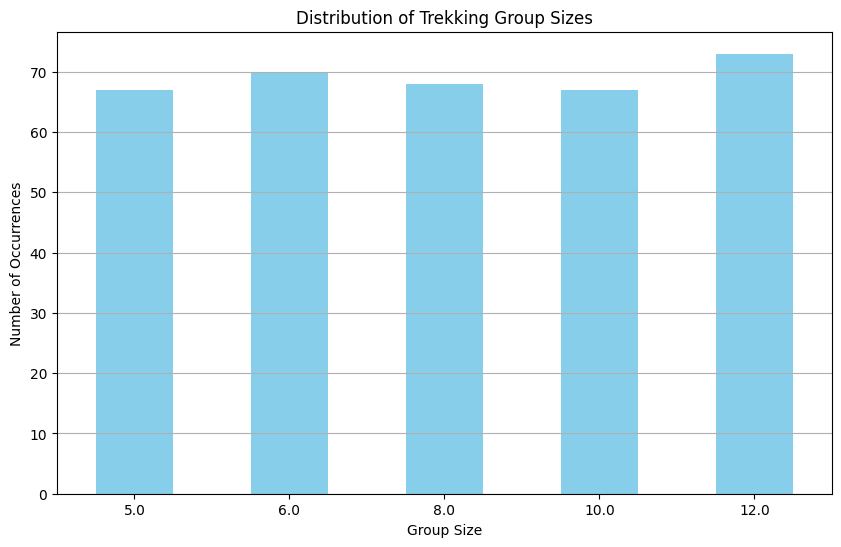

In [63]:
import matplotlib.pyplot as plt

# Count the occurrences of each group size
group_size_counts = df['Trekking Group Size'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
group_size_counts.sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Trekking Group Sizes')
plt.xlabel('Group Size')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Data shows common group sizes (5 to 12 members) based on the Figure , the median would be better for filling missing values.

In [64]:
# Calculate the median of the Trekking Group Size
median_group_size = df['Trekking Group Size'].median()

# Fill missing values with the median
df['Trekking Group Size'] = df['Trekking Group Size'].fillna(median_group_size)

# Check for remaining null values
remaining_nulls = df['Trekking Group Size'].isnull().sum()
print(f'Remaining null values: {remaining_nulls}')

Remaining null values: 0


## **`Review/Satisfaction` Column**

In [65]:
print(df['Review/Satisfaction'].unique())

[4.5 nan 5.  4.  3.5 3. ]


In [66]:
print(df['Review/Satisfaction'].value_counts())

Review/Satisfaction
5.0    73
3.5    70
3.0    68
4.5    67
4.0    67
Name: count, dtype: int64


/var/folders/5k/8v79yq9x6tq6jrygp62tqszr0000gn/T/ipykernel_75485/1842055276.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




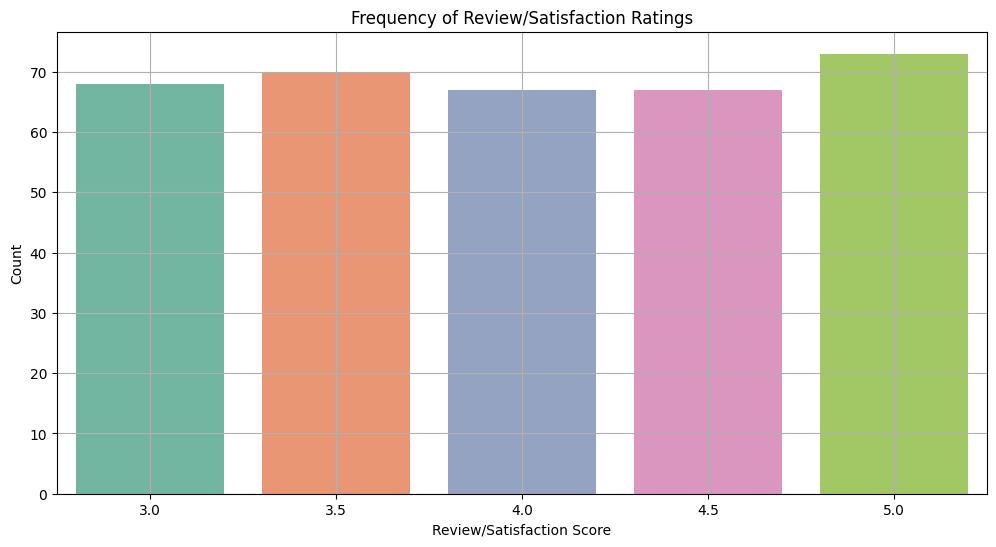

In [67]:
import seaborn as sns
# Plotting the Count Plot for Frequency of Each Rating
plt.figure(figsize=(12, 6))
sns.countplot(x='Review/Satisfaction', data=df, palette='Set2')
plt.title('Frequency of Review/Satisfaction Ratings')
plt.xlabel('Review/Satisfaction Score')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [68]:
#  Handling missing values
# Using median to fill missing values
median_review = df['Review/Satisfaction'].median()
df['Review/Satisfaction'] = df['Review/Satisfaction'].fillna(median_review)

# Checking for remaining null values and describe the distribution
remaining_nulls = df['Review/Satisfaction'].isnull().sum()
print(f'Remaining null values in Review/Satisfaction: {remaining_nulls}')

# Optional: Describe the updated Review/Satisfaction column
print(df['Review/Satisfaction'].describe())

Remaining null values in Review/Satisfaction: 0
count    383.000000
mean       4.009138
std        0.677264
min        3.000000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: Review/Satisfaction, dtype: float64


In [69]:
print(df['Review/Satisfaction'].unique())

[4.5 4.  5.  3.5 3. ]


In [70]:
df.to_csv('Anushka.csv')